In [14]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/')

import numpy as np
import math
import matplotlib.pyplot as plt
import os
import time

from ghost.simulator import GhostSimulator

plt.rcParams['text.usetex'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RMSE: 19.739108287426316


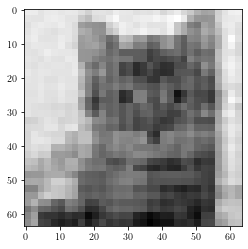

In [15]:
# test one image
path = '../common/cat.png'
camera_res = (1, 1)
slm_res = (64, 64)
sim = GhostSimulator(path, slm_res, 64*64*0.1)
cnt = sim.run_simulation()
rmse = sim.calc_rmse()
print('RMSE:', rmse)

plt.imshow(sim.G2, cmap='gray')
plt.show()

In [16]:
psnrs = dict()
rmses = dict()

M_ratios = [0.01, 0.10, 0.25, 0.5, 0.75, 1]
# M_ratios = list(np.arange(0.01, 1.01, 0.01))

0.01 30.399994354655345 18.47333354949236
0.1 19.739108287426316 22.22425301748538
0.25 14.097778209857411 25.147790131783147
0.5 8.205203652187857 29.849016315464063
0.75 4.418499281486581 35.2253078345434
1 0.0 inf


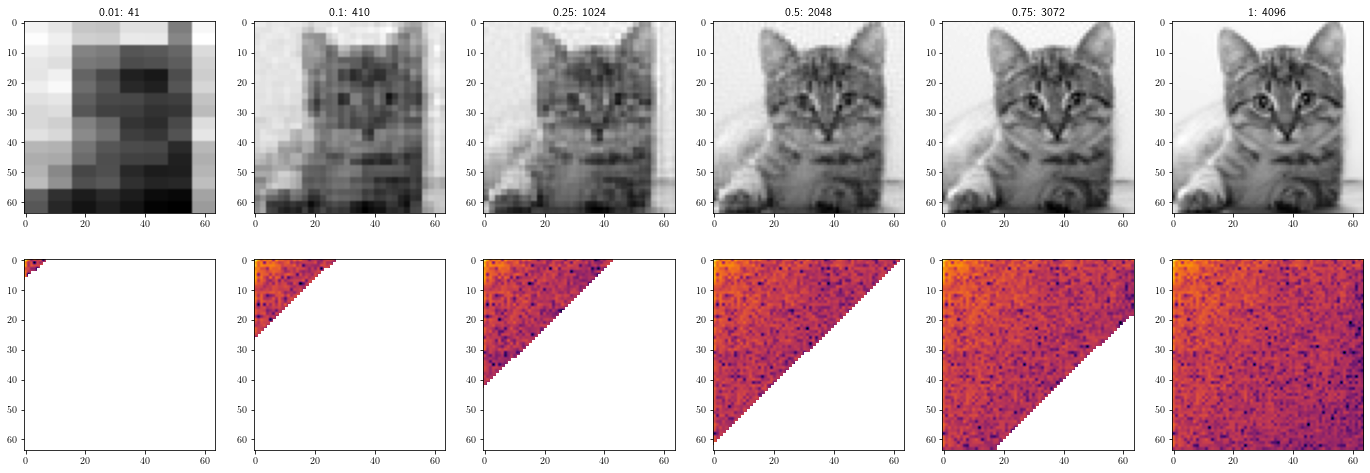

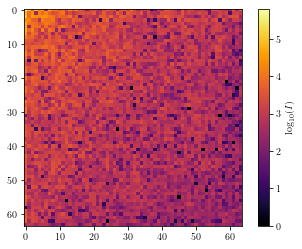

In [17]:
# try different number of filters
path = '../common/cat.png'
shape = (64, 64)
rmses['zigzag'] = []
psnrs['zigzag'] = []

fig, axs = plt.subplots(nrows=2, ncols=len(M_ratios), figsize=(4*len(M_ratios), 8))

for i, w in enumerate(M_ratios):
    sim = GhostSimulator(path, shape, w*shape[0]*shape[1], method='zigzag')
    cnt = sim.run_simulation()
    G2, I = sim.G2, sim.I

    axs[0, i].set_title(f'{w}: {cnt}')
    axs[0, i].imshow(G2, cmap='gray')
    axs[1, i].imshow(np.log10(np.abs(I), where=np.abs(I)>0), cmap='inferno')
     
    rmse = sim.calc_rmse()
    psnr = sim.calc_psnr()
    rmses['zigzag'].append(rmse)
    psnrs['zigzag'].append(psnr)
    print(w, rmse, psnr)

plt.show()

plt.imshow(np.log10(np.abs(I), where=np.abs(I)>0), cmap='inferno')
cbar = plt.colorbar()
cbar.set_label(r'$\log_{10}(I)$')
plt.savefig('../output.png', format='png', dpi=300)
plt.show()

0.01 34.66690388508171 17.332502481156645
0.1 20.31354439618041 21.97508945628745
0.25 14.49071125418647 24.90900955531151
0.5 9.603560721644708 28.482157874875227
0.75 4.750987753310946 34.595125390008036
1 0.0 inf


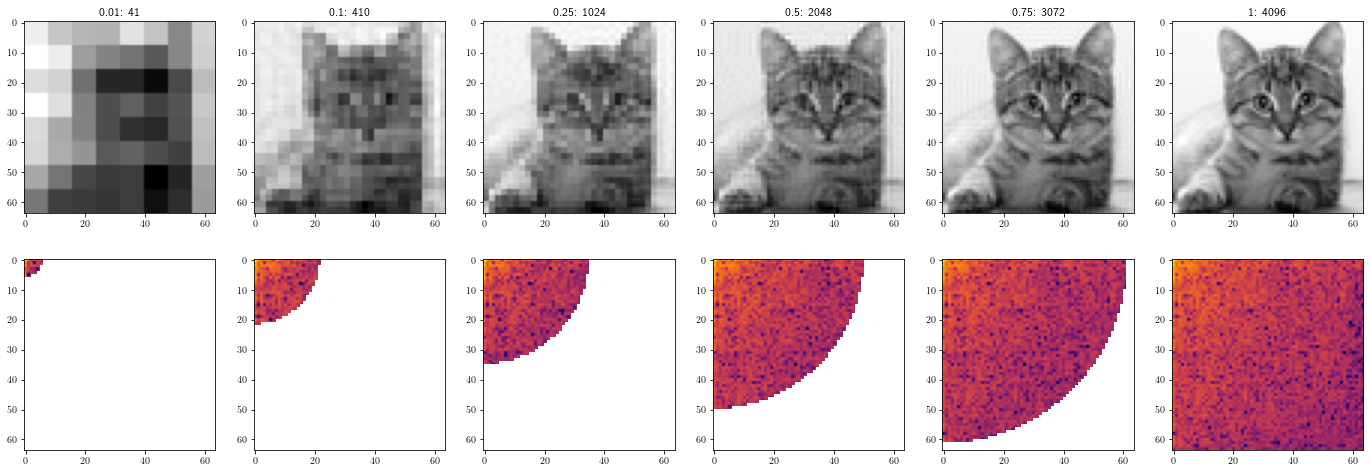

In [18]:
# try different number of filters
path = '../common/cat.png'
shape = (64, 64)
rmses['circular'] = []
psnrs['circular'] = []

fig, axs = plt.subplots(nrows=2, ncols=len(M_ratios), figsize=(4*len(M_ratios), 8))

for i, w in enumerate(M_ratios):
    sim = GhostSimulator(path, shape, w*shape[0]*shape[1], method='circular')
    cnt = sim.run_simulation()
    G2, I = sim.G2, sim.I

    axs[0, i].set_title(f'{w}: {cnt}')
    axs[0, i].imshow(G2, cmap='gray')
    axs[1, i].imshow(np.log(np.abs(I), where=np.abs(I)>0), cmap='inferno')

    rmse = sim.calc_rmse()
    psnr = sim.calc_psnr()

    rmses['circular'].append(rmse)
    psnrs['circular'].append(psnr)
    print(w, rmse, psnr)

plt.show()

0.01 37.77352720326894 16.58705280628058
0.1 20.639069948376285 21.837001150146076
0.25 14.552936606306904 24.87179085807471
0.5 10.567201222748274 27.651604060197805
0.75 6.6854420998353925 31.62820097082401
1 0.0 inf


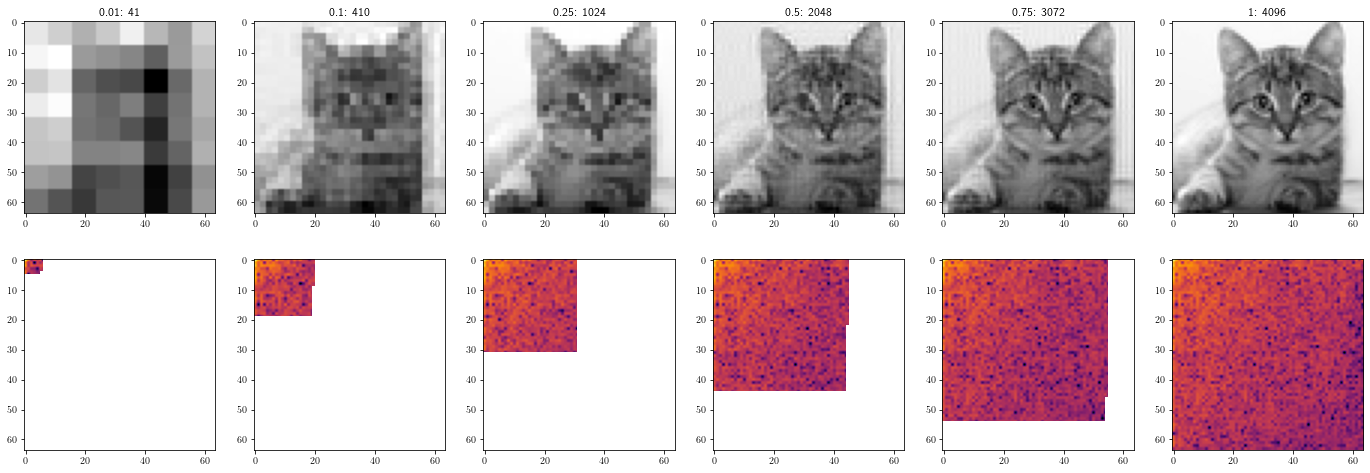

In [19]:
# try different number of filters
path = '../common/cat.png'
shape = (64, 64)
rmses['square'] = []
psnrs['square'] = []

fig, axs = plt.subplots(nrows=2, ncols=len(M_ratios), figsize=(4*len(M_ratios), 8))

for i, w in enumerate(M_ratios):
    sim = GhostSimulator(path, shape, w*shape[0]*shape[1], method='square')
    cnt = sim.run_simulation()
    G2, I = sim.G2, sim.I

    axs[0, i].set_title(f'{w}: {cnt}')
    axs[0, i].imshow(G2, cmap='gray')
    axs[1, i].imshow(np.log(np.abs(I), where=np.abs(I)>0), cmap='inferno')

    rmse = sim.calc_rmse()
    psnr = sim.calc_psnr()

    rmses['square'].append(rmse)
    psnrs['square'].append(psnr)
    print(w, rmse, psnr)

plt.show()

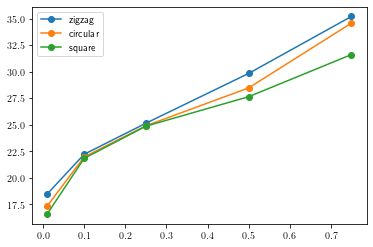

In [20]:
for key in psnrs:
    plt.plot(M_ratios, psnrs[key], 'o-', label=key)

plt.legend()
plt.show()

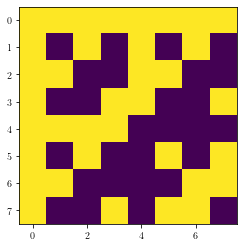

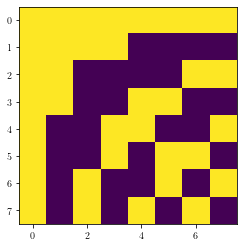

In [21]:
def test_hadamard(shape):
    '''
    generate Hadamard matrix of size shape with
    '''
    order = math.ceil(math.log(max(shape[0], shape[1]), 2))
    h = np.array([[1, 1], [1, -1]])
    for i in range(order-1):
        h = np.kron(h, np.array([[1, 1], [1, -1]]))

    plt.imshow(h)
    plt.show()    
    # sort hadamard by frequency
    def calculate_flip(H):
        return sum([H[i] != H[i+1] for i in range(H.shape[0]-1)])

    h = np.array(sorted(h, key=lambda row: calculate_flip(row)))
    plt.imshow(h)
    plt.show()    

test_hadamard((8, 8))